#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [ ]:
from torchvision.datasets import CIFAR10
import torchvision.transforms.v2 as T

In [ ]:
transforms = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

dataset = CIFAR10(
    root='./tmp',
    train=True,
    download=True,
    transform=transforms
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


Files already downloaded and verified


In [ ]:
dataset[0][0]

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

In [ ]:
import matplotlib.pyplot as plt

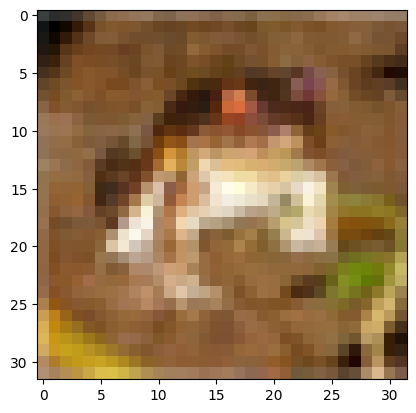

In [ ]:
plt.imshow(dataset[0][0])

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
x = dataset[0][0]

In [ ]:
conv = nn.Conv2d(
    in_channels=3,
    out_channels=5,
    kernel_size=3
)

In [ ]:
b = x.unsqueeze(0)
b.shape # batch channels height width

torch.Size([1, 3, 32, 32])

In [ ]:
o = conv(b)
o.shape

torch.Size([1, 5, 30, 30])

In [ ]:
pool = nn.MaxPool2d(kernel_size=2)

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 3)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(6, 12, 3)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc = nn.Linear(in_features=12*6*6, out_features=10)

  def forward(self, X):
    # feature extraction
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out) # b x 12 x 6 x 6

    out = th.flatten(out, start_dim=1) # b x 12*6*6
    out = self.fc(out)
    return out

In [ ]:
net = ConvNet()
o = net(b)
o.shape

torch.Size([1, 10])

## Задачи для самостоятельного решения

In [1]:
import torch as th
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.v2 as T
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt

In [ ]:
!wget 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Qa18lQGYmIWhLw'

In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('Qa18lQGYmIWhLw') as zip:
  ZipFile.extractall(zip)

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

- [ ] Проверено на семинаре

In [5]:
from tqdm import tqdm

In [6]:
shuffled_indices = th.randperm(4000)
train_indices = shuffled_indices[:int(4000 * 0.8)]
test_indices = shuffled_indices[int(4000 * 0.8):]
train_indices.shape, test_indices.shape

(torch.Size([3200]), torch.Size([800]))

In [7]:
transforms = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor()
])
train = DataLoader(
    ImageFolder('cat_breeds_4', transform=transforms),
    batch_size=128,
    sampler=SubsetRandomSampler(train_indices)
)
psum    = th.tensor([0.0, 0.0, 0.0])
psum_sq = th.tensor([0.0, 0.0, 0.0])

# loop through images
cnt_img = 0
for inputs, idx in tqdm(train):
  cnt_img += 1
  psum    += inputs.sum(axis        = [0, 2, 3])
  psum_sq += (inputs ** 2).sum(axis = [0, 2, 3])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(
100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


In [8]:
count = 3200 * 300 * 300

# mean and std
total_mean = psum / count
total_var  = (psum_sq / count) - (total_mean ** 2)
total_std  = th.sqrt(total_var)

# output
print('mean: '  + str(total_mean))
print('std:  '  + str(total_std))

mean: tensor([0.4989, 0.4505, 0.4055])
std:  tensor([0.2645, 0.2580, 0.2568])


In [10]:
transforms = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
    T.Normalize(mean=total_mean, std=total_std)
])

In [11]:
def collate_gpu(batch):
  x, t = th.utils.data.default_collate(batch)
  return x.to(device="cuda"), t.to(device="cuda")

In [12]:
train = DataLoader(
    ImageFolder('cat_breeds_4', transform=transforms),
    batch_size=128,
    sampler=SubsetRandomSampler(train_indices),
    collate_fn=collate_gpu
)
test = DataLoader(
    ImageFolder('cat_breeds_4', transform=transforms),
    batch_size=128,
    sampler=SubsetRandomSampler(test_indices),
    collate_fn=collate_gpu
)

In [ ]:
f"{cnt_img=}, classes={len(ImageFolder('cat_breeds_4').classes)}"

'cnt_img=25, classes=4'

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

In [ ]:
th.cuda.is_available()

True

In [13]:
n_epoch = 10
gamma = 0.1
net_clf = nn.Sequential(
    nn.Linear(in_features=3*300*300, out_features=1000, device='cuda'),
    nn.ReLU(),
    nn.Linear(in_features=1000, out_features=4, device='cuda')
)
crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_clf.parameters(), lr=gamma)
scheduler = ExponentialLR(optimizer, gamma=0.9)
loss_train = []
acc_train = []
acc_test = []

for epoch in range(n_epoch):
  total = 0
  correct = 0
  for imgs, y in train:
    X = th.flatten(imgs, start_dim=1)
    out = net_clf(X)
    _, pred = th.max(out, 1)
    total += y.size(0)
    correct += (pred == y).sum().item()

    loss = crit(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  scheduler.step()
  acc_train.append(correct / total)
  loss_train.append(loss.item())

  total = 0
  correct = 0
  for imgs, y in test:
    X = th.flatten(imgs, start_dim=1)
    out = net_clf(X)
    _, pred = th.max(out, 1)
    total += y.size(0)
    correct += (pred == y).sum().item()
  acc_test.append(correct / total)

  print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 81719.25
Epoch: 1, Loss: 31183.01953125
Epoch: 2, Loss: 16445.77734375
Epoch: 3, Loss: 6295.4853515625
Epoch: 4, Loss: 4905.99755859375
Epoch: 5, Loss: 2235.13330078125
Epoch: 6, Loss: 3221.274658203125
Epoch: 7, Loss: 4643.4306640625
Epoch: 8, Loss: 1422.332763671875
Epoch: 9, Loss: 2526.64794921875


In [14]:
print(f'accuracy train = {acc_train[-1]}\naccuracy test = {acc_test[-1]}')

accuracy train = 0.681875
accuracy test = 0.36375


In [15]:
for param in net_clf.parameters():
  print(param.shape)

torch.Size([1000, 270000])
torch.Size([1000])
torch.Size([4, 1000])
torch.Size([4])


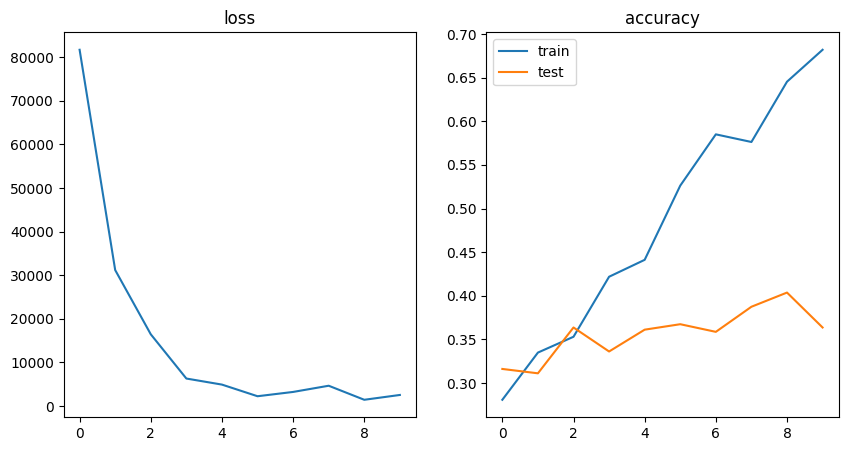

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].plot(loss_train)
axes[0].set_title('loss')
axes[1].plot(acc_train, label='train')
axes[1].plot(acc_test, label='test')
axes[1].set_title('accuracy')
plt.legend();

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
th.save(net_clf.state_dict(), './drive/MyDrive/данные/model.pth')

<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

In [ ]:
net_clf = nn.Sequential(
    nn.Linear(in_features=3*300*300, out_features=1000),
    nn.ReLU(),
    nn.Linear(in_features=1000, out_features=4)
)
net_clf.load_state_dict(th.load('./drive/MyDrive/данные/model.pth', th.device('cpu')))

<All keys matched successfully>

In [59]:
def show_examples(model, dataset, k=6):
  for X, y in dataset:
    indices = th.randperm(X.shape[0])[:k]
    X_ = X[indices]
    Y = y[indices]
    try:
      x = th.flatten(X[indices], start_dim=1)
      out = model(x)
    except Exception:
      out = model(X)
    _, pred = th.max(out, 1)
    break

  fig, axes = plt.subplots(nrows=k // 3, ncols=3)
  ax = axes.ravel()
  for i in range(k):
    image = X[i].cpu()
    image = (image * 255.0)
    ax[i].imshow(image.permute(1, 2, 0).to(th.uint8), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'true - {Y[i]} pred - {pred[i]}')
  plt.show()

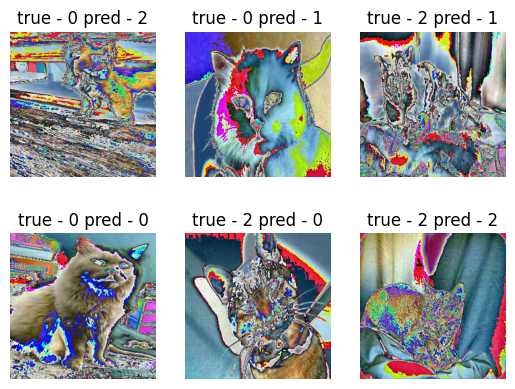

In [60]:
show_examples(net_clf, test)

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

- [ ] Проверено на семинаре

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    if th.cuda.is_available():
      dev = 'cuda'
    else:
      dev = 'cpu'
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, device=dev)
    self.pool1 = nn.MaxPool2d(kernel_size=2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, device=dev)
    self.pool2 = nn.MaxPool2d(kernel_size=2)

    self.fc1 = nn.Linear(in_features=85264, out_features=1024, device=dev)
    self.fc2 = nn.Linear(in_features=1024, out_features=4, device=dev)

  def forward(self, X):
    # feature extraction
    out = self.conv1(X)
    out = out.relu()
    out = self.pool1(out)
    out = self.conv2(out)
    out = out.relu()
    out = self.pool2(out)

    out = th.flatten(out, start_dim=1)
    out = self.fc1(out)
    out = out.relu()
    out = self.fc2(out)
    return out

Epoch: 0, Loss: 1.3451581001281738
Epoch: 1, Loss: 1.4014818668365479
Epoch: 2, Loss: 1.306731104850769
Epoch: 3, Loss: 1.3048094511032104
Epoch: 4, Loss: 1.3448818922042847
Epoch: 5, Loss: 1.2692475318908691
Epoch: 6, Loss: 1.2759519815444946
Epoch: 7, Loss: 1.2499529123306274
Epoch: 8, Loss: 1.3589271306991577
Epoch: 9, Loss: 1.239272952079773
accuracy train = 0.456875
accuracy test = 0.4575


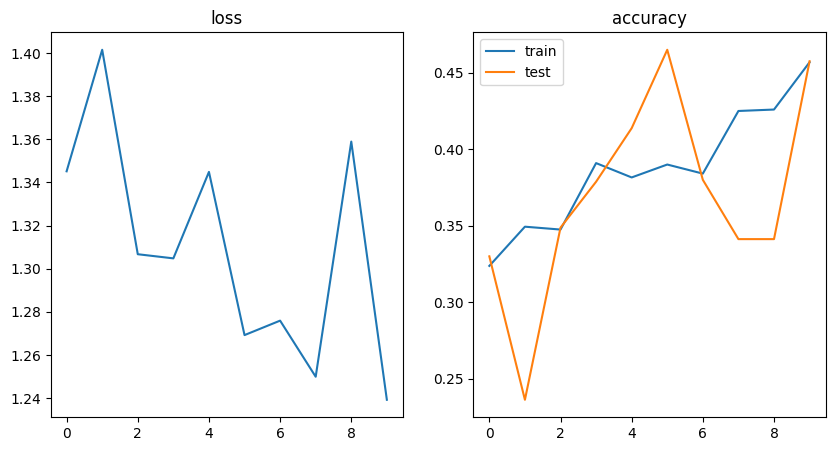

In [ ]:
n_epoch = 10
gamma = 0.1
conv_net = ConvNet()
crit = nn.CrossEntropyLoss()
optimizer = optim.SGD(conv_net.parameters(), lr=gamma)
loss_train = []
acc_train = []
acc_test = []

for epoch in range(n_epoch):
  total = 0
  correct = 0
  for imgs, y in train:
    out = conv_net(imgs)
    _, pred = th.max(out, 1)
    total += y.size(0)
    correct += (pred == y).sum().item()

    loss = crit(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  acc_train.append(correct / total)
  loss_train.append(loss.item())

  total = 0
  correct = 0
  for imgs, y in test:
    out = conv_net(imgs)
    _, pred = th.max(out, 1)
    total += y.size(0)
    correct += (pred == y).sum().item()
  acc_test.append(correct / total)

  print(f'Epoch: {epoch}, Loss: {loss.item()}')
print(f'accuracy train = {acc_train[-1]}\naccuracy test = {acc_test[-1]}')
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].plot(loss_train)
axes[0].set_title('loss')
axes[1].plot(acc_train, label='train')
axes[1].plot(acc_test, label='test')
axes[1].set_title('accuracy')
plt.legend();

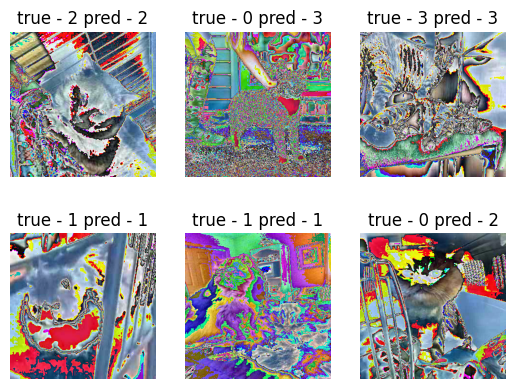

In [ ]:
show_examples(conv_net, test)

In [ ]:
for param in conv_net.parameters():
  print(param.shape)

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([16, 32, 3, 3])
torch.Size([16])
torch.Size([1024, 85264])
torch.Size([1024])
torch.Size([4, 1024])
torch.Size([4])


<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре

In [ ]:
X, Y = next(iter(test))
X = X[0].view(1, 3, 300, 300)
X.shape

torch.Size([1, 3, 300, 300])

In [ ]:
o = conv_net.conv1(X)
o.shape

torch.Size([1, 32, 298, 298])

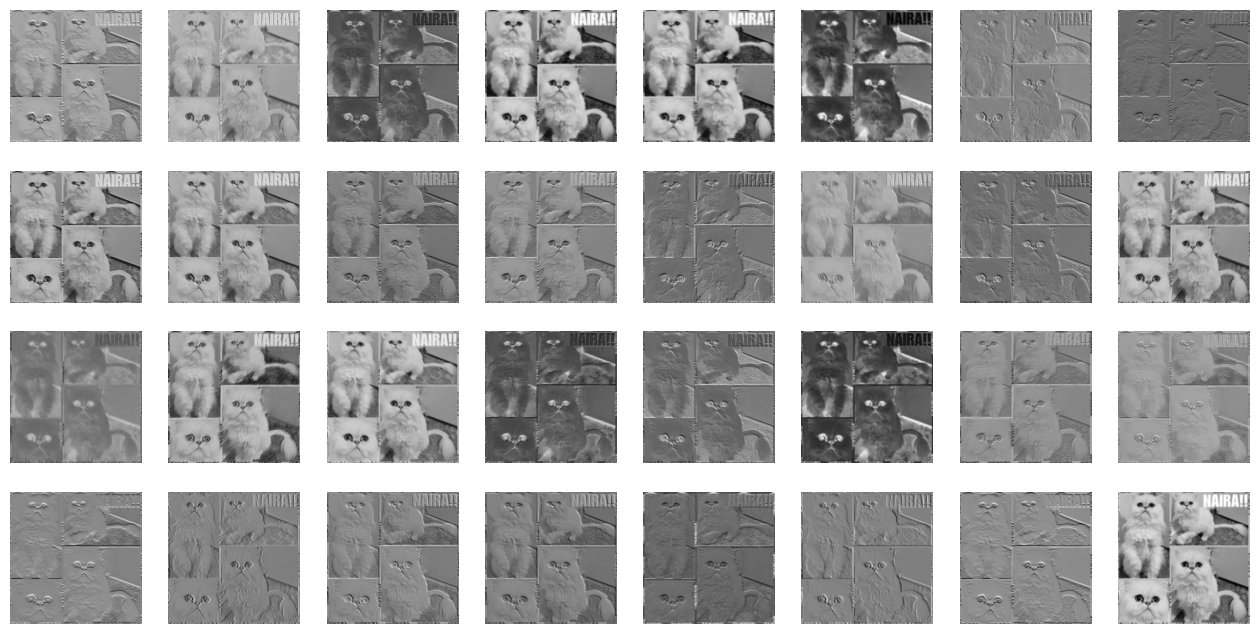

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
  ax.imshow(o.cpu().detach().numpy()[0, i, :, :], cmap='gray')
  ax.axis('off')
plt.show()

## Обратная связь
- [x] Хочу получить обратную связь по решению